# Customer Satisfaction Analysis

## Data Understanding

This part is necessary for understanding the data that will be utilized in our logistic regression model. Understanding the nature of the features and samples is important for effective data processing, which will facilitate more accurate results in the subsequent stages of model development.

#### Import Libraries

In [701]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

pd.set_option('future.no_silent_downcasting', True) #No warning for downcasting

#### Load dataset

In [702]:
dataset = pd.read_csv('Customer-survey-data.csv')
dataset.head()

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


### Reviewing the dataset

#### 1. Verifying Dataset Dimensions

In [703]:
rows, columns = dataset.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10616
Number of columns: 5


#### 2. Dataset Information

In [704]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 5 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                      --------------  -----  
 0   Customer                                                                                                                                                    10616 non-null  int64  
 1   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    10198 non-null  float64
 2   How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely sat

#### 4. Renaming Dataset Columns
Renaming columns and making it shorter enhances clarity and readability also make it easier to understand the data at a glance.

In [705]:
dataset = dataset.rename(columns={'Customer': 'Customer',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery_experience',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'food_quality',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'delivery_speed',
       'Was your order accurate? Please respond yes or no.': 'Order_Accuracy'})
dataset

,Customer,delivery_experience,food_quality,delivery_speed,Order_Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes


In [706]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             10616 non-null  int64  
 1   delivery_experience  10198 non-null  float64
 2   food_quality         10364 non-null  float64
 3   delivery_speed       10377 non-null  float64
 4   Order_Accuracy       9956 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 414.8+ KB


#### 5. Converting Order Accuracy Responses to Binary Values
Many machine learning algorithms and statistical models require numeric input. Converting categorical responses (e.g., "Yes"/"No") to binary values (1/0) makes the data compatible for analysis.

In [707]:
dataset['Order_Accuracy'] = dataset['Order_Accuracy'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
dataset

,Customer,delivery_experience,food_quality,delivery_speed,Order_Accuracy
0,1,5.0,3.0,4.0,1.0
1,2,3.0,4.0,3.0,1.0
2,3,4.0,5.0,2.0,1.0
3,4,5.0,3.0,4.0,1.0
4,5,2.0,5.0,1.0,1.0
...,...,...,...,...,...
10611,10612,4.0,2.0,3.0,1.0
10612,10613,3.0,3.0,3.0,1.0
10613,10614,5.0,3.0,3.0,1.0
10614,10615,3.0,3.0,3.0,1.0


### 6. Converting Order Accuracy as Continuous datatype

#### 7. Convert specified columns to appropriate numeric data types

In [708]:
dataset['delivery_experience'] = dataset['delivery_experience'].astype('float64')
dataset['food_quality'] = dataset['food_quality'].astype('float64')
dataset['delivery_speed'] = dataset['delivery_speed'].astype('float64')
dataset['Customer'] = dataset['Customer'].astype('int64')

#### 8. Identify categorical and continuous features in the dataset

In [709]:
categorical = dataset.select_dtypes(include=['object']).columns
continuous = dataset.select_dtypes(include=['float64']).columns

print(f"Number of categorical features: {len(categorical)}")
print(f"Number of continuous features: {len(continuous)}")

Number of categorical features: 0
Number of continuous features: 4


In [710]:
print("\nCategorical Features:")
print(categorical)
print("\nContinuous Features:")
print(continuous)


Categorical Features:
Index([], dtype='object')

Continuous Features:
Index(['delivery_experience', 'food_quality', 'delivery_speed',
       'Order_Accuracy'],
      dtype='object')


#### 9. Check for NaN values in each column of the dataset

In [711]:
nan_counts = dataset.isna().sum()
print(nan_counts)

Customer                 0
delivery_experience    418
food_quality           252
delivery_speed         239
Order_Accuracy         660
dtype: int64


#### 10. Filling Missing Values

In [712]:
for col in dataset: 
    dataset[col] = dataset[col].fillna(dataset[col].median())

#### 11. Check for NaN values after filling

In [713]:
print("NaN values in dataset after handling:\n", dataset.isna().sum())

NaN values in dataset after handling:
 Customer               0
delivery_experience    0
food_quality           0
delivery_speed         0
Order_Accuracy         0
dtype: int64


#### 12. Statistical Overview of the Dataset

In [714]:
dataset.describe()

,Customer,delivery_experience,food_quality,delivery_speed,Order_Accuracy
count,10616.000000,10616.000000,10616.000000,10616.000000,10616.000000
mean,5308.500000,3.312453,3.324133,3.315656,0.732008
std,3064.719563,1.392957,1.398730,1.393790,0.442934
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2654.750000,2.000000,2.000000,2.000000,0.000000
50%,5308.500000,3.000000,3.000000,3.000000,1.000000
75%,7962.250000,5.000000,5.000000,5.000000,1.000000
max,10616.000000,5.000000,5.000000,5.000000,1.000000


## Data Visualization

#### 1. Visualizing Categorical Data

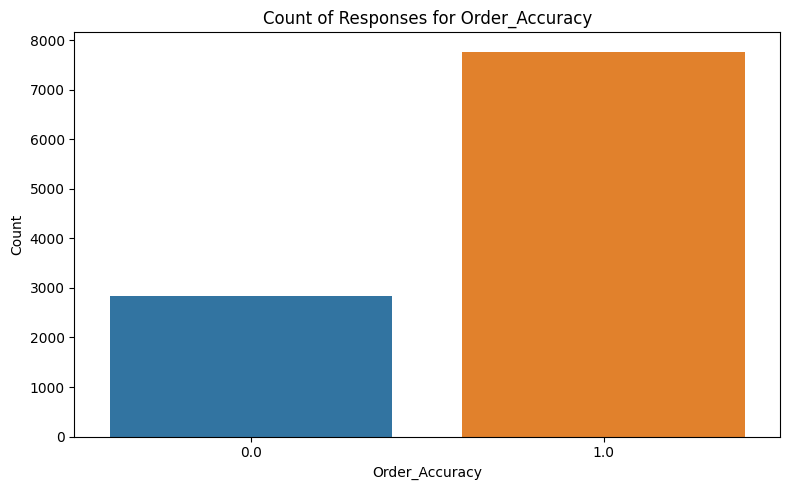

In [715]:
categorical_features = ['Order_Accuracy']

plt.figure(figsize=(8, 5))

for feature in categorical_features:
    plt.subplot(1, 1, 1)
    sns.countplot(data=dataset, x=feature, hue=feature, palette='tab10', legend=False)
    plt.title(f'Count of Responses for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### 2.Visualizing Continuous Data

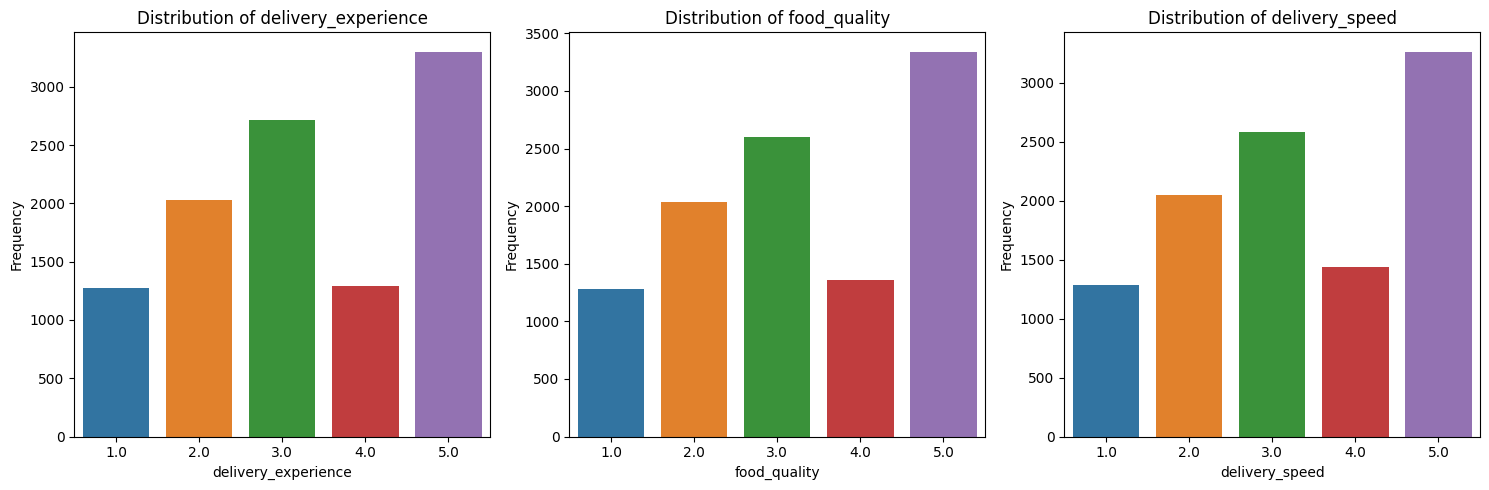

In [716]:
# Define the continuous features
continuous_features = ['delivery_experience', 'food_quality', 'delivery_speed']

plt.figure(figsize=(15, 5))

# Loop through each feature and use countplot
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=dataset[feature].round(), hue=dataset[feature].round(), data=dataset, palette='tab10', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

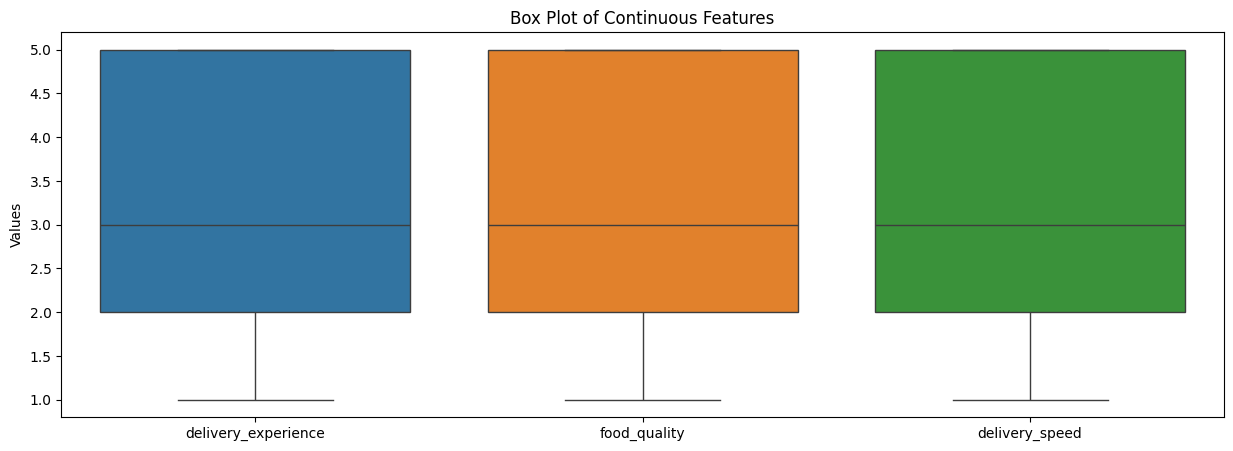

In [717]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=dataset[continuous_features])
plt.title('Box Plot of Continuous Features')
plt.ylabel('Values')
plt.show()

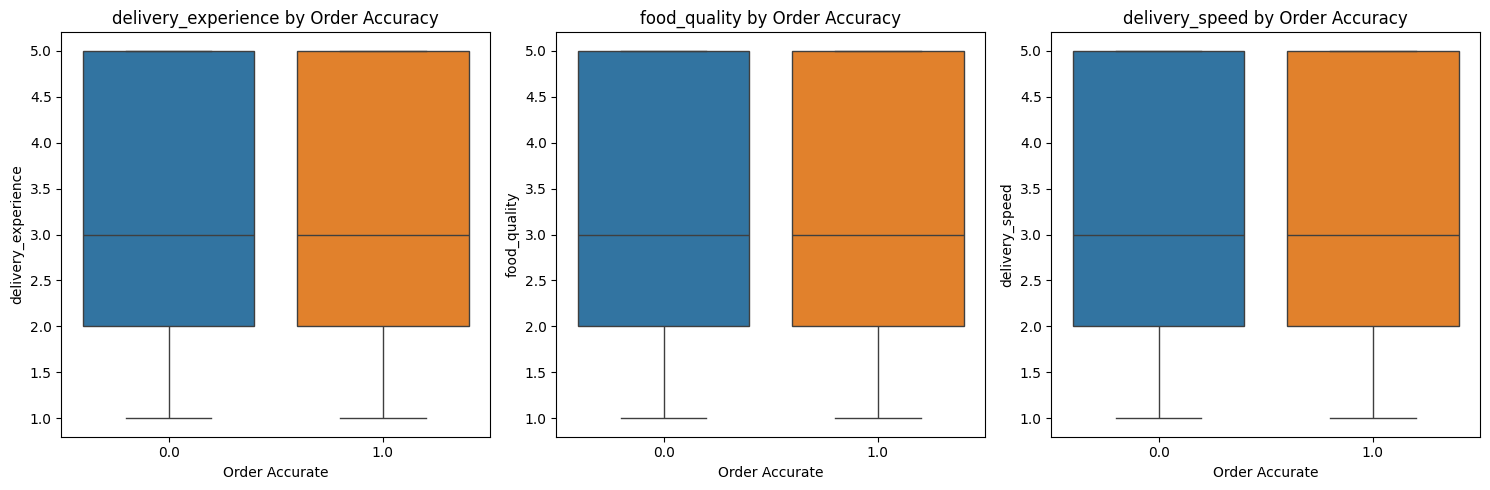

In [718]:
# Define the continuous features
continuous_features = ['delivery_experience', 'food_quality', 'delivery_speed']

plt.figure(figsize=(15, 5))

# Loop through each feature and plot a boxplot against `Order_Accuracy`
for i, feature in enumerate(continuous_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Order_Accuracy', y=feature, hue='Order_Accuracy', data=dataset, palette='tab10', legend=False)
    plt.title(f'{feature} by Order Accuracy')
    plt.xlabel('Order Accurate')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

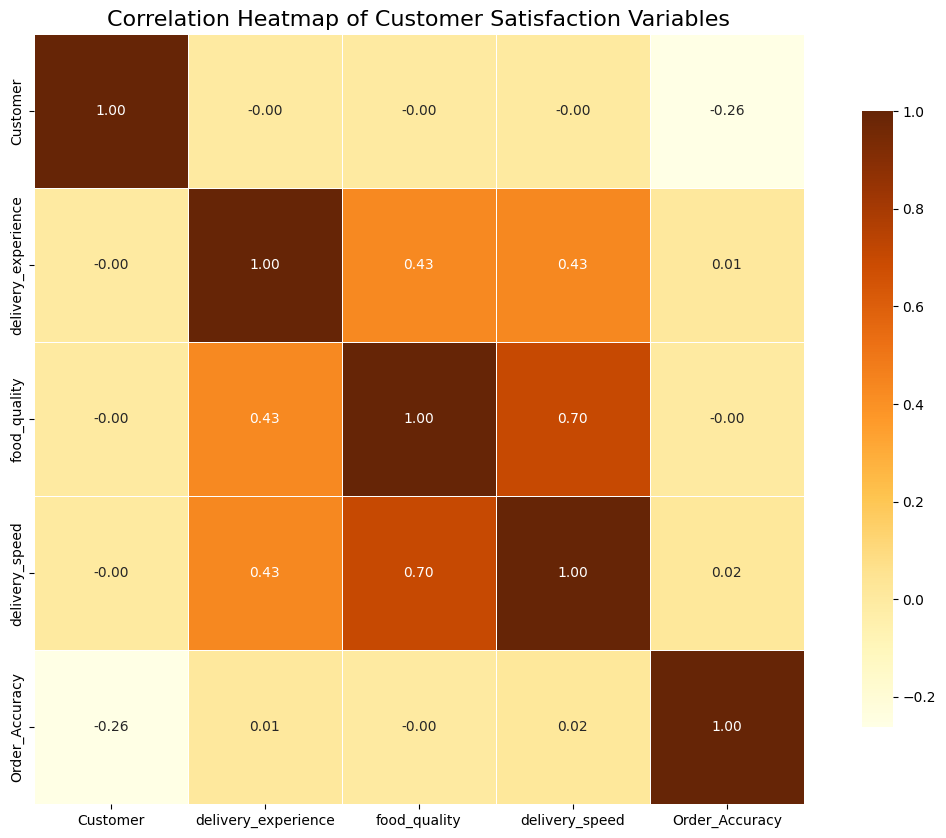

In [719]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrBr', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Correlation Heatmap of Customer Satisfaction Variables', fontsize=16)

plt.show()

- There are no strong correlation of the `Order_Accuracy` against the `delivery_experience`, `food_quality`, and `delivery_speed`.
- We need to build our dependent variable based on the 3 features that shows high correlation.

##  Feature Engineering

### Getting the inputs and output

In [720]:
X = dataset.iloc[:,1:-1].values
pd.DataFrame(X)

,0,1,2
0,5.0,3.0,4.0
1,3.0,4.0,3.0
2,4.0,5.0,2.0
3,5.0,3.0,4.0
4,2.0,5.0,1.0
...,...,...,...
10611,4.0,2.0,3.0
10612,3.0,3.0,3.0
10613,5.0,3.0,3.0
10614,3.0,3.0,3.0


In [721]:
y = dataset.iloc[:,-1].values
pd.DataFrame(y)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
10611,1.0
10612,1.0
10613,1.0
10614,1.0


### Creating the Training Set and the Test Set

In [722]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8492, 3)
X_test shape: (2124, 3)
y_train shape: (8492,)
y_test shape: (2124,)


### Feature Scaling

In [723]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

In [724]:
#X_train

In [725]:
dataset['Order_Accuracy'].unique()

array([1., 0.])

## Building and training the model

### 1. Training the model

In [726]:
model = LogisticRegression(random_state=0)

# Train the model on the original X_train_scaled, y_train
model.fit(X_train, y_train)


LogisticRegression(random_state=0)

### 3. Inference

Making the predictons of the data points in the test set

In [727]:
y_pred = model.predict(X_test)

In [728]:
# Convert predictions to a DataFrame and display
pd.DataFrame(y_pred)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2119,1.0
2120,1.0
2121,1.0
2122,1.0


In [734]:
set(y_pred)

{np.float64(1.0)}

In [730]:
model.predict([[1, 2, 3]])

array([1.])

## Evaluating the model 

#### 1. Predict on the test set

In [731]:
y_pred = model.predict(X_test)

### 2. Confusion Matrix

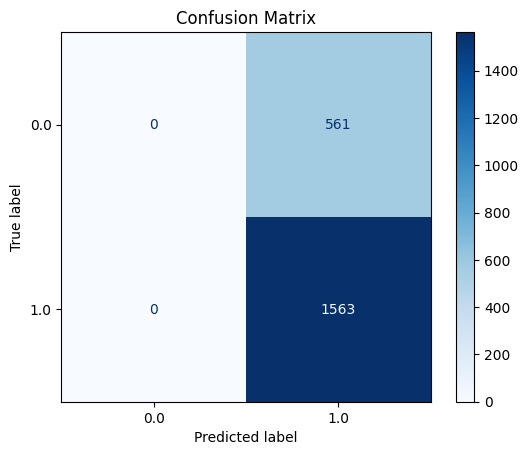

In [732]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Visualizing the Confusion Matrix

### 3. Accuracy

In [733]:
accuracy_score(y_test,y_pred)

0.7358757062146892